In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E-commerce Dataset.csv to E-commerce Dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('E-commerce Dataset.csv')
df.head()
print(df.describe())

              Aging   Customer_Id         Sales      Quantity      Discount  \
count  51289.000000  51290.000000  51289.000000  51288.000000  51289.000000   
mean       5.255035  58155.758764    152.340872      2.502983      0.303821   
std        2.959948  26032.215826     66.495419      1.511859      0.131027   
min        1.000000  10000.000000     33.000000      1.000000      0.100000   
25%        3.000000  35831.250000     85.000000      1.000000      0.200000   
50%        5.000000  61018.000000    133.000000      2.000000      0.300000   
75%        8.000000  80736.250000    218.000000      4.000000      0.400000   
max       10.500000  99999.000000    250.000000      5.000000      0.500000   

             Profit  Shipping_Cost  
count  51290.000000   51289.000000  
mean      70.407226       7.041557  
std       48.729488       4.871745  
min        0.500000       0.100000  
25%       24.900000       2.500000  
50%       59.900000       6.000000  
75%      118.400000      11.8

In [ ]:
print("===Missing values in each variable ===")
print(df.isnull().sum())

print("===Missing values count ===")
print(df.isnull().sum().sum())

print("===Rows that have at least one missing value ===")
print(df[df.isnull().any(axis=1)])

print("===Remove rows with missing values ===")
df_cleaned = df.dropna()

print("===Summary statistics===")
print(df_cleaned.describe())

print("===checking duplicate row count===")
print(df_cleaned.duplicated().sum())

===Missing values in each variable ===
Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64
===Missing values count ===
8
===Rows that have at least one missing value ===
     Order_Date      Time  Aging  Customer_Id  Gender Device_Type  \
27   2018-05-02  11:45:38    NaN        26058  Female         Web   
95   2018-04-22  11:32:22    5.0        52267    Male         Web   
211  2018-08-05  17:27:54    6.0        47137    Male         Web   
321  2018-06-05  11:04:11    3.0        41850    Male         Web   
535  2018-04-16  16:20:02    3.0        13777    Male         Web   
625  2018-10-15  20:16:34    2.0        26367    Male  

===Month wise Profit===


<ipython-input-8-83a4db8b2518>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Order_Date'] = pd.to_datetime(df_cleaned['Order_Date'])


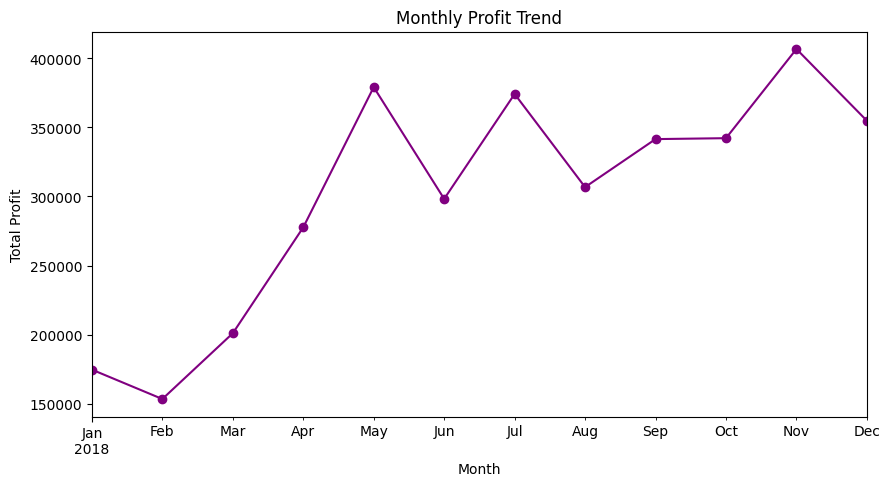

In [ ]:
#Profitability Trends Over Time(month wise)

# Convert the 'Order_Date' column to datetime format
df_cleaned['Order_Date'] = pd.to_datetime(df_cleaned['Order_Date'])
# Group by month and sum profit
profit_trend = df_cleaned.groupby(df_cleaned["Order_Date"].dt.to_period("M"))["Profit"].sum()

print('===Month wise Profit===')
plt.figure(figsize=(10, 5))
profit_trend.plot(kind="line", marker="o", title="Monthly Profit Trend", color="purple")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.show()




<ipython-input-22-2f4302defa84>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order_Hour', y='Sales', data=profit_by_hour, palette='Blues')


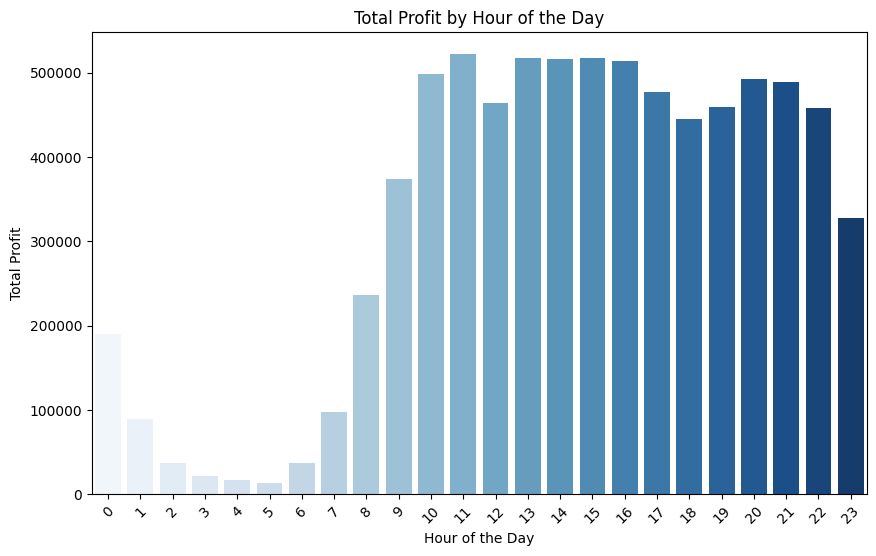

<ipython-input-22-2f4302defa84>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_profit_by_weekday.index, y=avg_profit_by_weekday.values, palette="Blues_r")


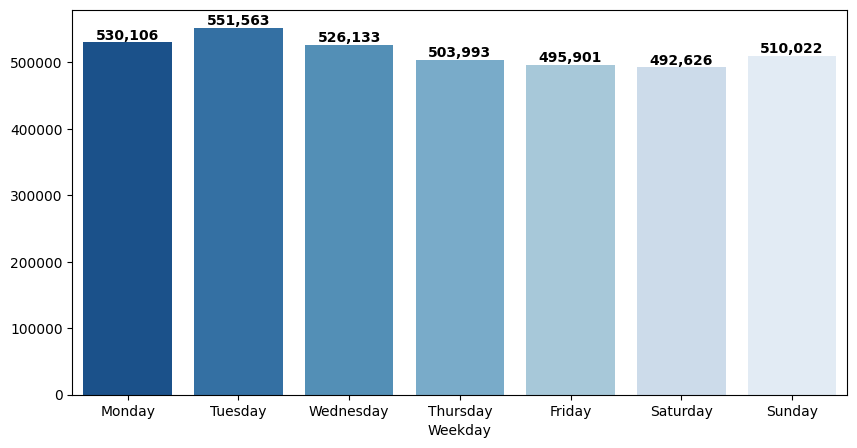

In [ ]:
#Profitability by Order Time (Peak Hours Analysis)

# Convert 'order Time' to datetime and extract hour
df_cleaned['Order_Hour'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S').dt.hour

# Group by hour and calculate Avg profit
profit_by_hour = df_cleaned.groupby('Order_Hour', as_index=False)['Sales'].sum()

# Bar plot of profit by hour
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Hour', y='Sales', data=profit_by_hour, palette='Blues')
plt.title('Total Profit by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


# Extract the weekday name from 'Order_Date'
df_cleaned['Weekday'] = df_cleaned['Order_Date'].dt.day_name()

# Group by weekday and calculate total profit
avg_profit_by_weekday = df_cleaned.groupby('Weekday')['Profit'].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot the bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=avg_profit_by_weekday.index, y=avg_profit_by_weekday.values, palette="Blues_r")

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
plt.show()






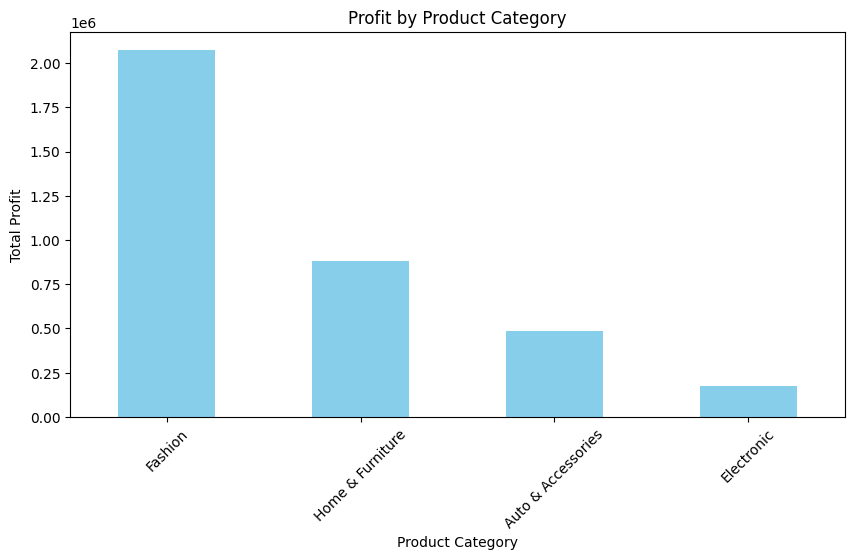

In [ ]:
# Group by product category and sum profit
category_profit = df_cleaned.groupby("Product_Category")["Profit"].sum().sort_values(ascending=False)

# Plot
category_profit.plot(kind="bar", figsize=(10, 5), title="Profit by Product Category", color="skyblue")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

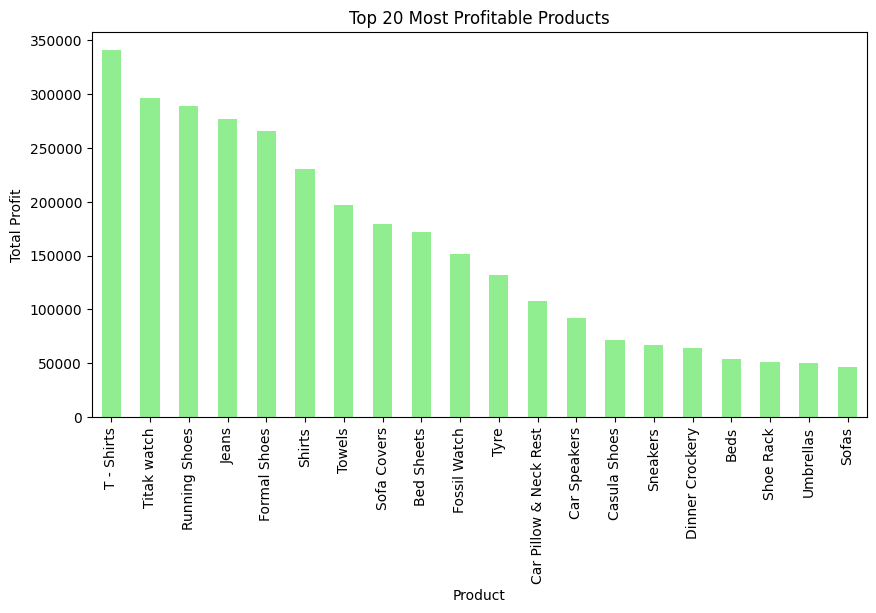

In [ ]:
#most profitable products

# Group by product and sum profit
product_profit = df_cleaned.groupby("Product")["Profit"].sum().sort_values(ascending=False).head(20)

# Plot
product_profit.plot(kind="bar", figsize=(10, 5), title="Top 20 Most Profitable Products", color="lightgreen")
plt.xlabel("Product")
plt.ylabel("Total Profit")
plt.xticks(rotation=90)
plt.show()


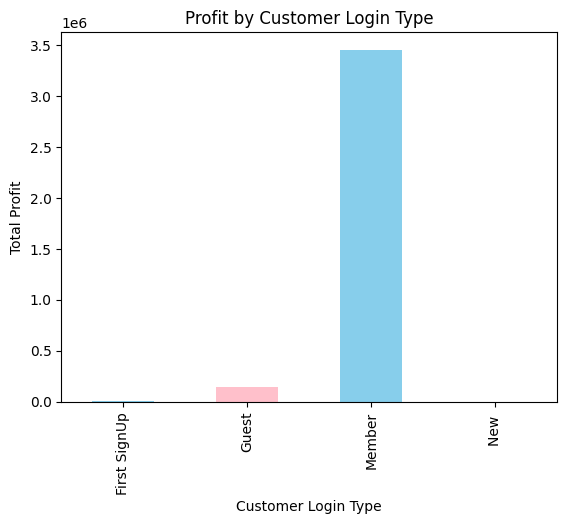

In [ ]:
#Profitability by Customer Login Type

# Group by product and sum profit
customer_profit = df_cleaned.groupby("Customer_Login_type")["Profit"].sum()

# Plot
customer_profit.plot(kind="bar", title="Profit by Customer Login Type", color=["skyblue", "pink"])
plt.xlabel("Customer Login Type")
plt.ylabel("Total Profit")
plt.show()

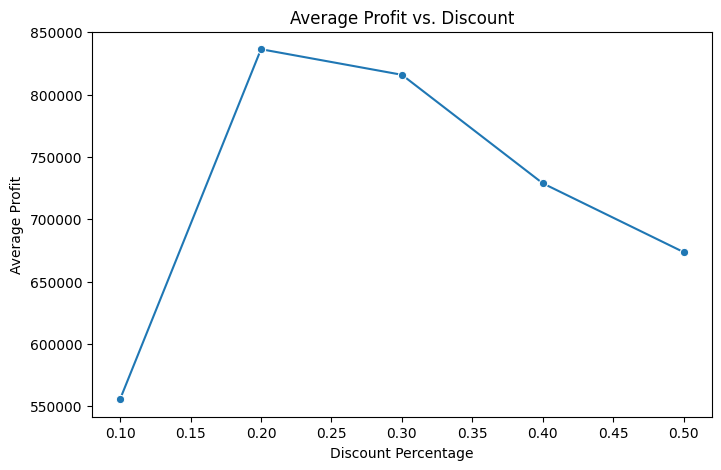

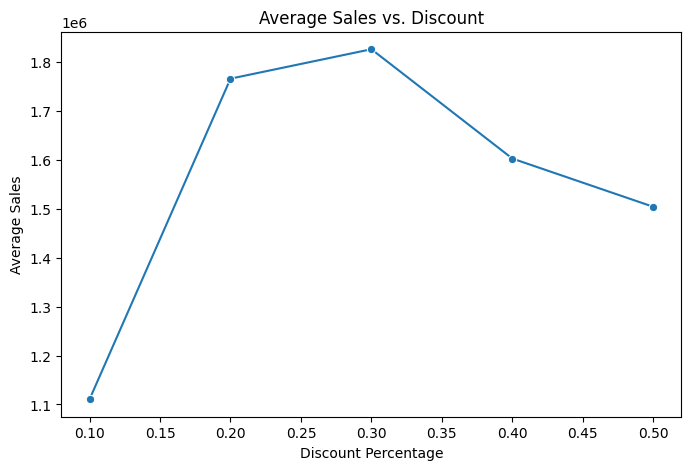

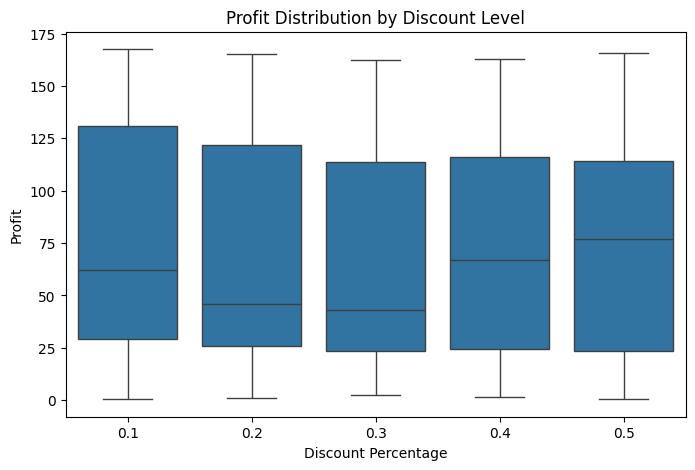

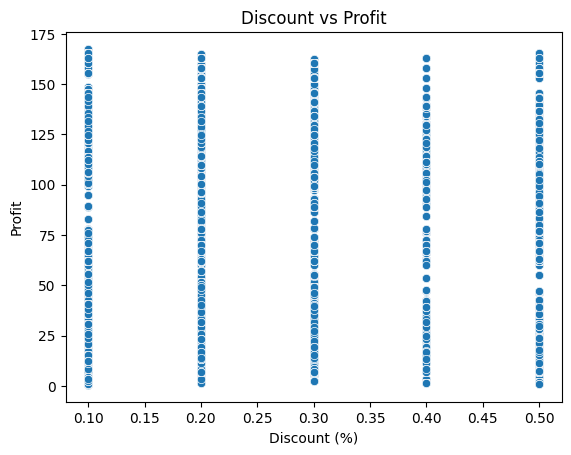

          Discount    Profit
Discount  1.000000 -0.003123
Profit   -0.003123  1.000000


In [ ]:
#Impact of Discounts on Profitability

# Aggregate profit per discount level
discount_profit = df_cleaned.groupby("Discount")["Profit"].sum()
plt.figure(figsize=(8, 5))
sns.lineplot(x=discount_profit.index, y=discount_profit.values, marker="o")
plt.title("Average Profit vs. Discount")
plt.xlabel("Discount Percentage")
plt.ylabel("Average Profit")
plt.show()

# Aggregate profit per discount level
discount_sales = df_cleaned.groupby("Discount")["Sales"].sum()
plt.figure(figsize=(8, 5))
sns.lineplot(x=discount_sales.index, y=discount_sales.values, marker="o")
plt.title("Average Sales vs. Discount")
plt.xlabel("Discount Percentage")
plt.ylabel("Average Sales")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["Discount"], y=df_cleaned["Profit"])
plt.title("Profit Distribution by Discount Level")
plt.xlabel("Discount Percentage")
plt.ylabel("Profit")
plt.show()


# Scatter plot of Discount vs Profit
sns.scatterplot(x='Discount', y='Profit', data=df_cleaned)
plt.title('Discount vs Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.show()

correlation = df_cleaned[['Discount', 'Profit']].corr()
print(correlation)


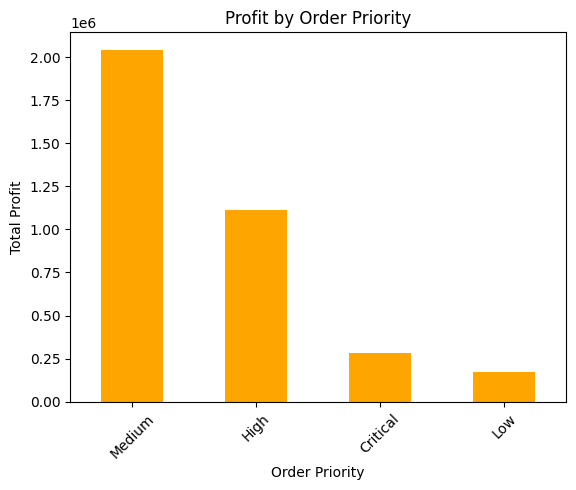

In [ ]:
#most Profitable Order Priorities

# Group by product and sum profit
priority_profit = df_cleaned.groupby("Order_Priority")["Profit"].sum().sort_values(ascending=False)

# Plot
priority_profit.plot(kind="bar", title="Profit by Order Priority", color="orange")
plt.xlabel("Order Priority")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

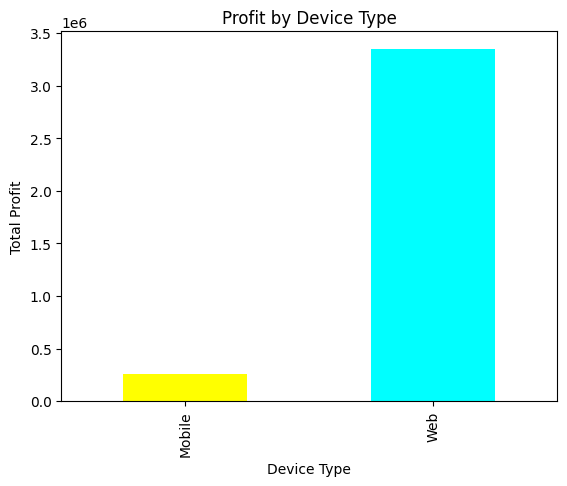

In [ ]:
#Device Type Vs Profitability

# Group by device type and sum profit
device_profit = df_cleaned.groupby("Device_Type")["Profit"].sum()

# Plot
device_profit.plot(kind="bar", title="Profit by Device Type", color=["yellow", "cyan"])
plt.xlabel("Device Type")
plt.ylabel("Total Profit")
plt.show()

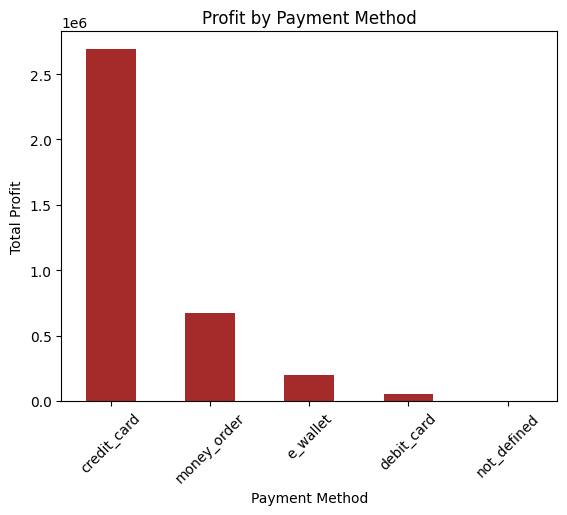

In [ ]:
#Effect of Payment Method on Profit

# Group by payment method and sum profit
payment_profit = df_cleaned.groupby("Payment_method")["Profit"].sum().sort_values(ascending=False)

# Plot
payment_profit.plot(kind="bar", title="Profit by Payment Method", color="brown")
plt.xlabel("Payment Method")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

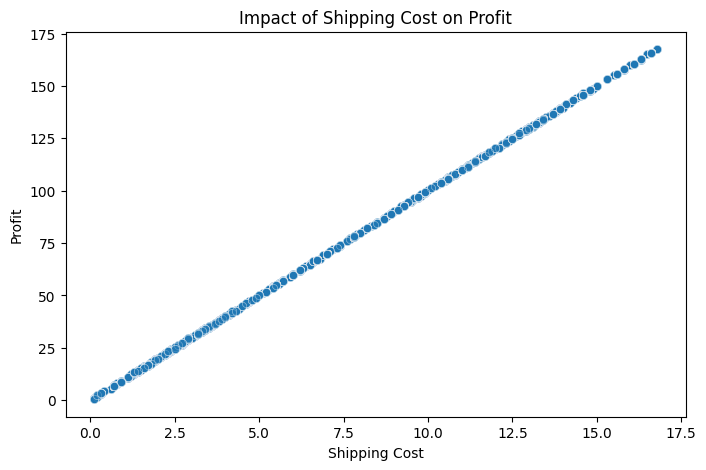

Correlation between Shiping cost and Profit: 0.999981645322564


In [ ]:
#Shipping Cost vs. Profit

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["Shipping_Cost"], y=df_cleaned["Profit"], alpha=0.5)
plt.title("Impact of Shipping Cost on Profit")
plt.xlabel("Shipping Cost")
plt.ylabel("Profit")
plt.show()

# Calculate the correlation between Shipping cost and Profit
correlation = df_cleaned['Shipping_Cost'].corr(df_cleaned['Profit'])
print(f"Correlation between Shiping cost and Profit: {correlation}")

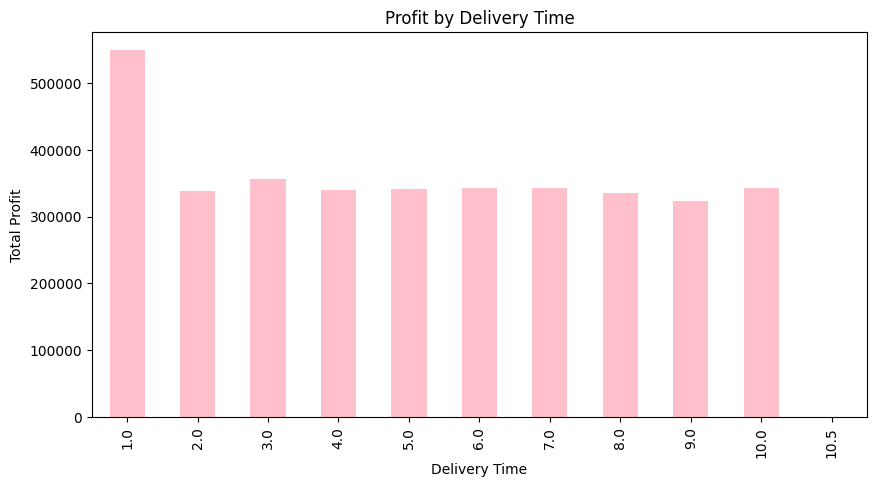

In [ ]:
#Profitability Based on Aging (Delivery Time Impact)

# Group by Aging and sum profit
profit_by_aging = df_cleaned.groupby('Aging')['Profit'].sum()

# Plot
profit_by_aging.plot(kind="bar", figsize=(10, 5), title="Profit by Delivery Time", color="pink")
plt.xlabel("Delivery Time")
plt.ylabel("Total Profit")
plt.show()

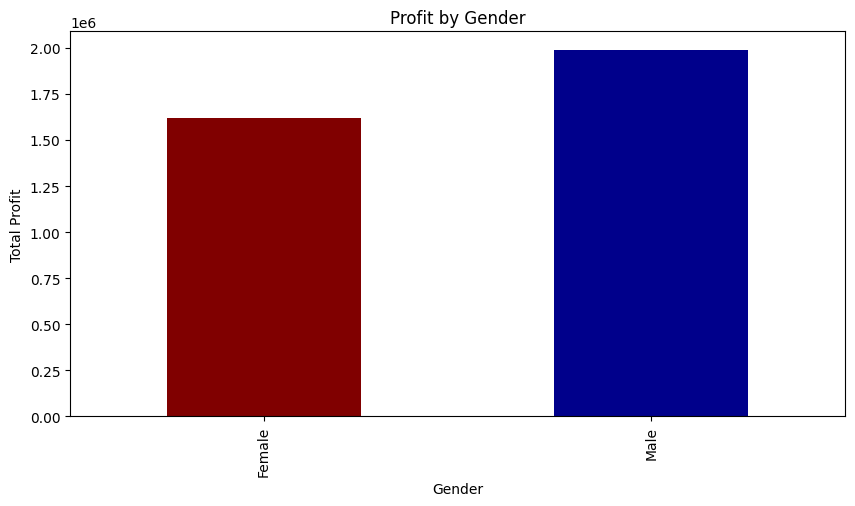

In [ ]:
#profitability by Gender (Customer Behavior Analysis)

# Group by gender and calculate total profit
profit_by_gender = df_cleaned.groupby('Gender')['Profit'].sum()

# Plot
profit_by_gender.plot(kind="bar", figsize=(10, 5), title="Profit by Gender", color=["maroon", "darkblue"])
plt.xlabel("Gender")
plt.ylabel("Total Profit")
plt.show()


<ipython-input-19-144c8710622c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Profit', data=profit_by_quantity, palette='pastel')


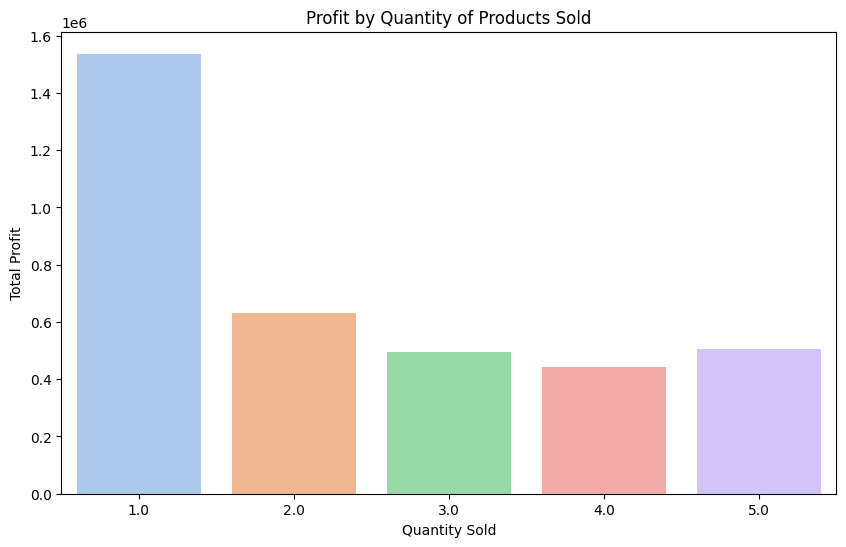

In [ ]:
# Group by quantity and sum profit
profit_by_quantity = df_cleaned.groupby('Quantity')['Profit'].sum().reset_index()

# Plot Profit by Quantity
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Profit', data=profit_by_quantity, palette='pastel')
plt.title('Profit by Quantity of Products Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Profit')
plt.show()

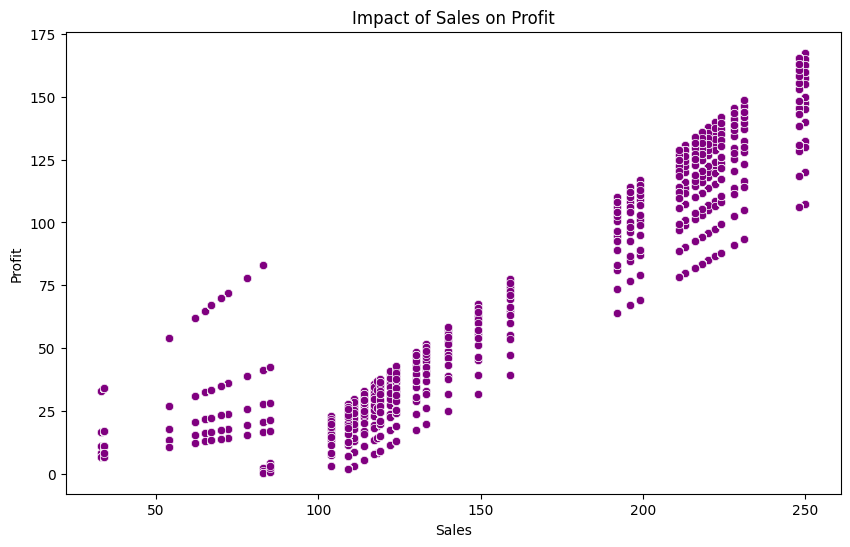

Correlation between Sales and Profit: 0.9167621600604022


In [ ]:
# Scatter plot of Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df_cleaned, color='purple')
plt.title('Impact of Sales on Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Calculate the correlation between Sales and Profit
correlation = df_cleaned['Sales'].corr(df_cleaned['Profit'])
print(f"Correlation between Sales and Profit: {correlation}")